In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
%matplotlib inline

In [3]:
def order_pics(pics):
    ordered_pics = []
    ordered_targ = []
    for i in range(41):
        num = i + 1
        for pic in pics:
            if int(pic.split('_')[1].replace('.jpg','')) == num:
                ordered_pics.append(pic)
                ordered_targ.append(num)
    return ordered_pics, ordered_targ
    
def load_images_from_folder(folder):
    images = []
    pics = os.listdir(folder)
    pics, target = order_pics(pics)
    for filename in pics:
        img = cv2.imread(os.path.join(folder,filename)) # read image
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # transform to grayscale
        img = cv2.resize(img, (80, 80), interpolation = cv2.INTER_AREA) # resize to 80x80
        if img is not None:
            images.append(img)
    return images, target

## Read images from folder and convert to np.array

In [4]:
folder = 'ORL'
X, y = load_images_from_folder(folder)

## Plotting matrix images

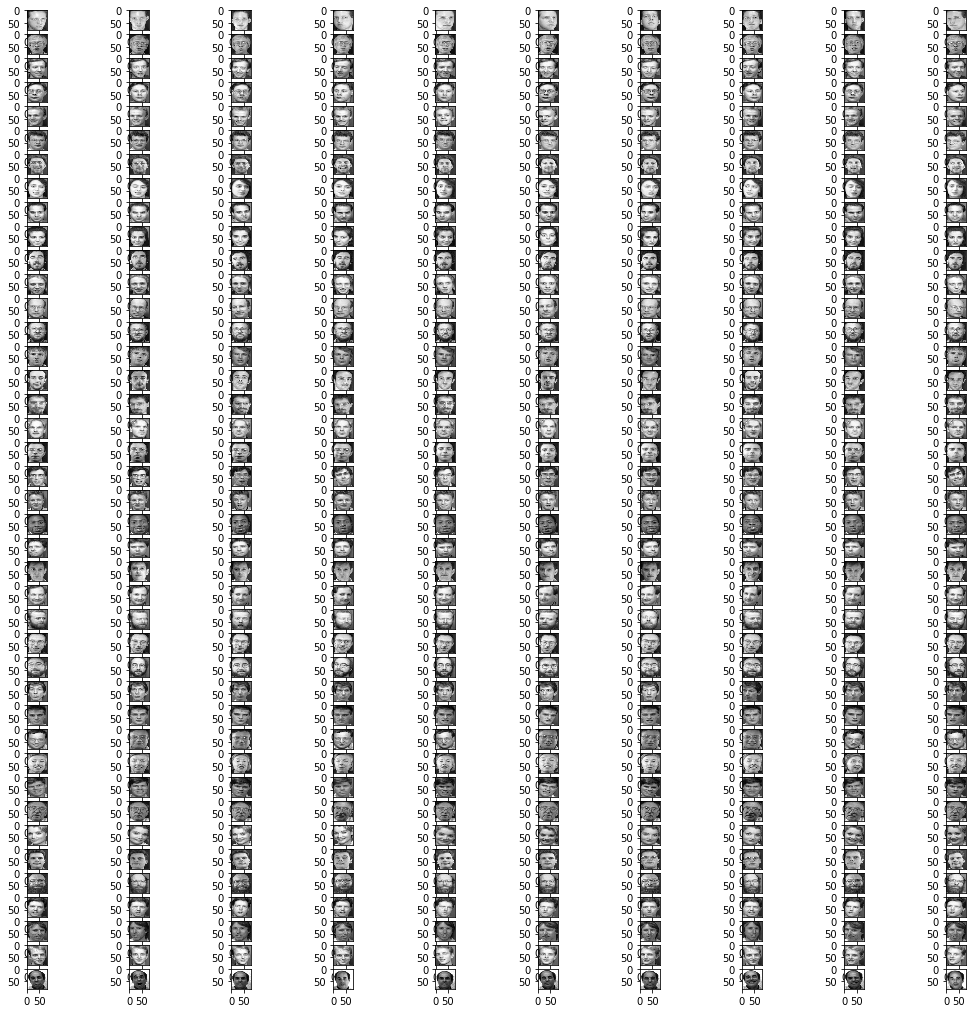

In [5]:
fig, axes = plt.subplots(41, 10, figsize=(18, 18))
for i, ax in enumerate(axes.flat):
    ax.imshow(np.array(X)[i].reshape(80, 80), cmap='gray')

## Train test split<br/> separate samples for each person 

In [6]:
X_train = list()
X_test = list()
y_train = list()
y_test = list()
for i in range(0, len(X), 10): # starts on index zero until the length of X for each 10
    person_X = X[i:i+10]
    person_y = y[i:i+10]
    X_train_Person, X_test_Person, y_train_Person, y_test_Person = train_test_split(person_X, person_y, 
                                                                                    test_size=0.3, random_state=14)
    X_train.extend(X_train_Person)
    X_test.extend(X_test_Person)
    y_train.extend(y_train_Person)
    y_test.extend(y_test_Person)

## Transform the number matrix into vector

In [7]:
train_vec = []
for i in X_train:
    train_vec.append(i.flatten('F')) 

# Calculate the mean of all images    
train_mean = np.mean([train_vec], axis=1)
train_mean = train_mean[0]

## Plot the mean image

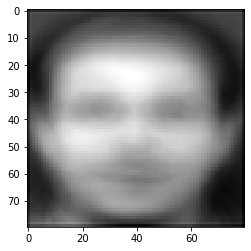

In [8]:
#Convert the mean vector to a transpose matrix
v1 = train_mean.reshape(80,80).T
plt.imshow(np.asarray(v1.squeeze()), cmap='gray')
plt.show()

## Initiate the model

In [9]:
def model_eigenfaces(num_components ,train_faces, train_labels, test_faces, test_labels):
    model = cv2.face.EigenFaceRecognizer_create(num_components)
    model.train(train_faces, np.array(train_labels))    
    pred = list()
    for i, image in enumerate(test_faces):
        label, confidence = model.predict(image)
        pred.append(label)
    
    accuracy = accuracy_score(pred, test_labels)
    return num_components, round(accuracy*100,2)    

## Test with different PCA values

In [10]:
n_comp = list()
accuracy = list()
for pca in range(1,21):
    pred, accur = model_eigenfaces(pca, X_train, y_train, X_test, y_test)
    n_comp.append(pred)
    accuracy.append(accur)

## Results

PCA number: 1, accuracy score: 12.2%
PCA number: 2, accuracy score: 39.84%
PCA number: 3, accuracy score: 67.48%
PCA number: 4, accuracy score: 73.17%
PCA number: 5, accuracy score: 81.3%
PCA number: 6, accuracy score: 86.18%
PCA number: 7, accuracy score: 91.06%
PCA number: 8, accuracy score: 94.31%
PCA number: 9, accuracy score: 92.68%
PCA number: 10, accuracy score: 94.31%
PCA number: 11, accuracy score: 94.31%
PCA number: 12, accuracy score: 95.12%
PCA number: 13, accuracy score: 95.12%
PCA number: 14, accuracy score: 94.31%
PCA number: 15, accuracy score: 93.5%
PCA number: 16, accuracy score: 93.5%
PCA number: 17, accuracy score: 93.5%
PCA number: 18, accuracy score: 93.5%
PCA number: 19, accuracy score: 94.31%
PCA number: 20, accuracy score: 94.31%


Text(0.5, 1.0, '% of Accuracy by number of components (PCA)')

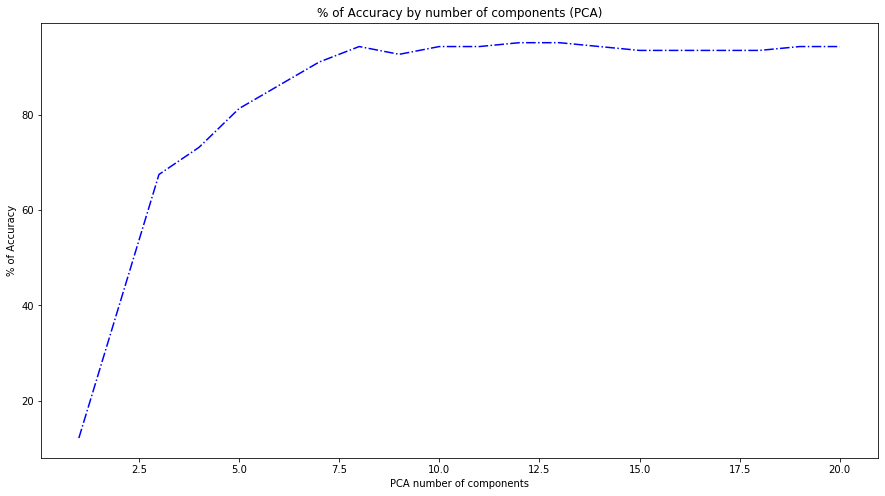

In [11]:
for i in range(len(n_comp)):
    print('PCA number: {}, accuracy score: {}%'.format(n_comp[i], accuracy[i]))
   
plt.rcParams['figure.figsize'] = (15,8)
plt.plot(n_comp, accuracy, 'b-.')
plt.xlabel('PCA number of components')
plt.ylabel('% of Accuracy')    
plt.title('% of Accuracy by number of components (PCA)')